In [45]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer, Conv2DTranspose,Input,Reshape
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import optimizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

import os
import matplotlib.pyplot as plt
import numpy as np
from IPython import display

In [46]:
import cv2
import PIL
from keras import backend
#from random import randint
from google.colab import files
import glob

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
train_start_index = 0
train_end_index = 600

test_start_index = 600
test_end_index = 900

In [49]:
dirname="/content/drive/MyDrive/colab/dataset/dataset/complete/";
files=['circle/']
labels=[1]



In [50]:
import re 
import math
from pathlib import Path 

file_pattern = re.compile(r'.*?(\d+).*?')
def get_order(file):
    match = file_pattern.match(Path(file).name)
    if not match:
        return math.inf
    return int(match.groups()[0])

sorted_files = sorted(files, key=get_order)


In [51]:
import os
def sortKeyFunc(s):
    return int(os.path.basename(s)[:-4])


In [52]:
images=[]
y=[]

for i in range(len(files)):
    cfiles=glob.glob(dirname+files[i]+'*.jpg')
    cfiles.sort(key=sortKeyFunc)
    
    for cf in cfiles:
        img=cv2.imread(cf)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        (thresh, imw) = cv2.threshold(img, 1, 1, 1)
        contours, _ = cv2.findContours(imw, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        for c in contours:
            rect = cv2.boundingRect(c)
            # if rect[2] < 100 or rect[3] < 100: 
            #   continue
            x11,y11,w11,h11 = rect
            # cv2.rectangle(img,(x11,y11),(x11+w11,y11+h11),(0,255,0),2)
        a11=x11
        b11=y11
        c11=x11+w11
        d11=y11+h11
        cropped_image = img[b11:d11 , a11:c11]
        newimg=cv2.resize(cropped_image, (56, 56))
        images.append(newimg)
        y.append(labels[i])

In [53]:
X=np.array(images)
y=np.array(y)
print(X.shape)
print(y.shape)

(900, 56, 56)
(900,)


In [54]:
dirname2="/content/drive/MyDrive/colab/dataset/dataset/partial/";
images2=[]
y2=[]
for i in range(len(files)):
    cfiles=glob.glob(dirname2+files[i]+'*.jpg')
    cfiles.sort(key=sortKeyFunc)
    
    for cf in cfiles:
        img=cv2.imread(cf)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        (thresh, imw) = cv2.threshold(img, 1, 1, 1)
        contours, _ = cv2.findContours(imw, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        for c in contours:
            rect = cv2.boundingRect(c)
            # if rect[2] < 100 or rect[3] < 100: 
            #   continue
            x11,y11,w11,h11 = rect
            # cv2.rectangle(img,(x11,y11),(x11+w11,y11+h11),(0,255,0),2)
        a11=x11
        b11=y11
        c11=x11+w11
        d11=y11+h11
        cropped_image = img[b11:d11 , a11:c11]
        newimg=cv2.resize(cropped_image, (56, 56))
        images2.append(newimg)
        y2.append(labels[i])
X2=np.array(images2)
y2=np.array(y2)
print(X2.shape)
print(y2.shape)

(900, 56, 56)
(900,)


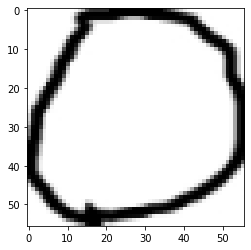

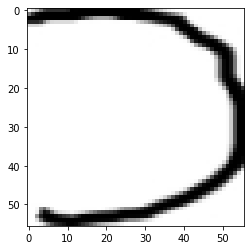

In [55]:
fig = plt.figure
plt.imshow(X[1], cmap='gray')
plt.show()
plt.imshow(X2[1], cmap='gray')
plt.show()

In [56]:
# define leaky ReLU function
def lrelu(x, alpha=0.1):
    return tf.math.maximum(alpha*x, x)

In [57]:
training_set=[]
train_lev=[]
for i in range(train_start_index, train_end_index):
  training_set.append(X[i])
  train_lev.append(y[i])
  train_imgs=np.array(training_set)
  train_labels=np.array(train_lev)
print(train_imgs.shape)
print(train_labels.shape)  

testing_set=[]
test_lev=[]
for i in range(test_start_index,test_end_index):
  testing_set.append(X[i])
  test_lev.append(y[i])
  test_imgs=np.array(testing_set)
  test_labels=np.array(test_lev)
print(test_imgs.shape)   
print(test_labels.shape)

(600, 56, 56)
(600,)
(300, 56, 56)
(300,)


In [58]:
train_imgs, test_imgs = train_imgs / 255.0, test_imgs / 255.0 
print(train_imgs.shape)

(600, 56, 56)


In [59]:
# check data array shapes:
print("Size of train images: {}, Number of train images: {}".format(train_imgs.shape[-2:], train_imgs.shape[0]))
print("Size of test images: {}, Number of test images: {}".format(test_imgs.shape[-2:], test_imgs.shape[0]))

Size of train images: (56, 56), Number of train images: 600
Size of test images: (56, 56), Number of test images: 300


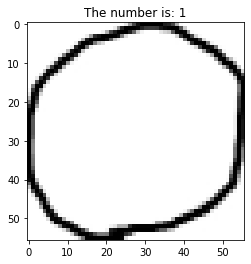

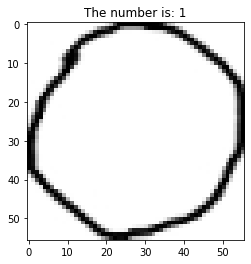

In [60]:
# plot distorted image example from training images
image_id_to_plot = 20
plt.imshow(tf.squeeze(train_imgs[image_id_to_plot]), cmap='gray')
plt.title("The number is: {}".format(train_labels[image_id_to_plot]))
plt.show()

# plot distorted image example from test images
plt.imshow(tf.squeeze(test_imgs[image_id_to_plot]), cmap='gray')
plt.title("The number is: {}".format(test_labels[image_id_to_plot]))
plt.show()
plt.close()

In [61]:
num_pixels = 56*56
train_imgs = train_imgs.reshape((train_end_index-train_start_index), num_pixels).astype('float32')
test_imgs = test_imgs.reshape((test_end_index-test_start_index), num_pixels).astype('float32')
print(train_imgs.shape)

(600, 3136)


In [62]:
training_partial_set=[]
train_partial_lev=[]
for i in range(train_start_index,train_end_index):
  training_partial_set.append(X2[i])
  train_partial_lev.append(y2[i])
  train_partial_imgs=np.array(training_partial_set)
  train_partial_labels=np.array(train_partial_lev)
print(train_partial_imgs.shape)
print(train_partial_labels.shape)  

testing_partial_set=[]
test_partial_lev=[]
for i in range(test_start_index,test_end_index):
  testing_partial_set.append(X2[i])
  test_partial_lev.append(y2[i])
  test_partial_imgs=np.array(testing_partial_set)
  test_partial_labels=np.array(test_partial_lev)
print(test_partial_imgs.shape)   
print(test_partial_labels.shape)

(600, 56, 56)
(600,)
(300, 56, 56)
(300,)


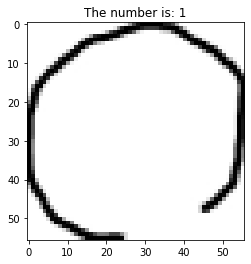

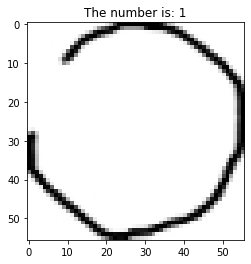

In [63]:
# plot distorted image example from training images
from tensorflow._api.v2.compat.v1 import train
image_id_to_plot = 20
plt.imshow(tf.squeeze(train_partial_imgs[image_id_to_plot]), cmap='gray')
plt.title("The number is: {}".format(train_partial_labels[image_id_to_plot]))
plt.show()

# plot distorted image example from test images
plt.imshow(tf.squeeze(test_partial_imgs[image_id_to_plot]), cmap='gray')
plt.title("The number is: {}".format(test_partial_labels[image_id_to_plot]))
plt.show()
plt.close()

In [64]:
num_pixels = 56*56
train_partial_imgs = train_partial_imgs.reshape((train_end_index-train_start_index), num_pixels).astype('float32')
test_partial_imgs = test_partial_imgs.reshape((test_end_index-test_start_index), num_pixels).astype('float32')
print(train_imgs.shape)

(600, 3136)


In [65]:
enco_deco = Sequential()
# Encoder
enco_deco.add(Dense(2500, input_dim=num_pixels, activation='LeakyReLU'))
enco_deco.add(Dense(2000, activation='LeakyReLU'))
enco_deco.add(Dense(1500, activation='LeakyReLU'))
enco_deco.add(Dense(1000, activation='LeakyReLU'))
enco_deco.add(Dense(500, activation='LeakyReLU'))
enco_deco.add(Dense(100, activation='LeakyReLU'))
 
#decoder
enco_deco.add(Dense(300, activation='LeakyReLU'))
enco_deco.add(Dense(500, activation='LeakyReLU'))
enco_deco.add(Dense(1000, activation='LeakyReLU'))
enco_deco.add(Dense(2000, activation='LeakyReLU'))
enco_deco.add(Dense(3136, activation='sigmoid'))
enco_deco.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 2500)              7842500   
                                                                 
 dense_12 (Dense)            (None, 2000)              5002000   
                                                                 
 dense_13 (Dense)            (None, 1500)              3001500   
                                                                 
 dense_14 (Dense)            (None, 1000)              1501000   
                                                                 
 dense_15 (Dense)            (None, 500)               500500    
                                                                 
 dense_16 (Dense)            (None, 100)               50100     
                                                                 
 dense_17 (Dense)            (None, 300)              

In [66]:
def cost_function(labels=None, logits=None, name=None):
    loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits, name=name)
    return tf.reduce_mean(loss)
learning_rate = 1e-5    
enco_deco.compile(optimizer=tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate),loss='binary_crossentropy',metrics=None)
#enco_deco.compile(loss='mean_squared_error', optimizer='adam')



In [67]:
histry=enco_deco.fit(train_partial_imgs, train_imgs, validation_data=(test_partial_imgs, test_imgs), epochs=800,
                     workers=1,batch_size=300, shuffle=True)
import os
if os.path.isfile('/content/drive/MyDrive/circleEnco.h5') is False:
  enco_deco.save('/content/drive/MyDrive/circleEnco.h5')

Epoch 1/800
2/2 [==============================] - 1s 198ms/step - loss: 2.8333 - val_loss: 1.7035
Epoch 2/800
2/2 [==============================] - 0s 55ms/step - loss: 1.6089 - val_loss: 1.2245
Epoch 3/800
2/2 [==============================] - 0s 67ms/step - loss: 1.1766 - val_loss: 1.0639
Epoch 4/800
2/2 [==============================] - 0s 47ms/step - loss: 1.0442 - val_loss: 0.9960
Epoch 5/800
2/2 [==============================] - 0s 59ms/step - loss: 0.9690 - val_loss: 0.9478
Epoch 6/800
2/2 [==============================] - 0s 54ms/step - loss: 0.9125 - val_loss: 0.9112
Epoch 7/800
2/2 [==============================] - 0s 55ms/step - loss: 0.8767 - val_loss: 0.8738
Epoch 8/800
2/2 [==============================] - 0s 42ms/step - loss: 0.8441 - val_loss: 0.8397
Epoch 9/800
2/2 [==============================] - 0s 61ms/step - loss: 0.8140 - val_loss: 0.8148
Epoch 10/800
2/2 [==============================] - 0s 57ms/step - loss: 0.7888 - val_loss: 0.7939
Epoch 11/800
2/2 [

In [68]:
predictions = enco_deco.predict(test_partial_imgs)
print("prediction set", predictions.shape)

10/10 [==============================] - 0s 2ms/step
prediction set (300, 3136)


Train images


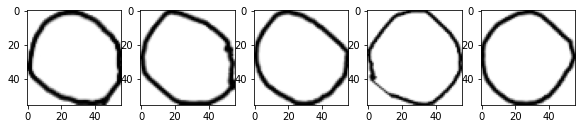

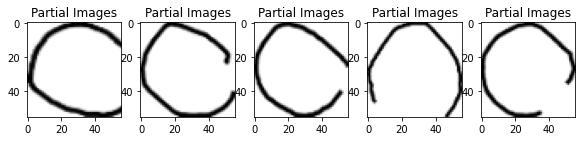

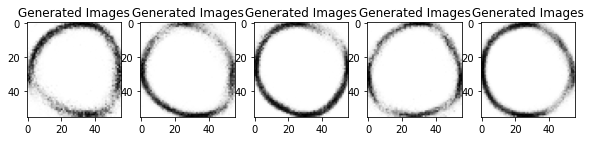

In [69]:
X_test = np.reshape(test_imgs, ((test_end_index-test_start_index),56,56)) *255
plt.figure(figsize=(20, 4))
print("Train images")
for i in range(5,10,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i,:,:], cmap='gray')
plt.show()
 
x_test_noisy = np.reshape(test_partial_imgs, (-1,56,56)) *255
plt.figure(figsize=(20, 4))
for i in range(5,10,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i,:,:], cmap='gray')
    plt.title("Partial Images")
plt.show()    
 
prediction = np.reshape(predictions, ((test_end_index-test_start_index),56,56)) *255
plt.figure(figsize=(20, 4))
for i in range(5,10,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(prediction[i,:,:], cmap='gray')
    plt.title("Generated Images")  
plt.show()

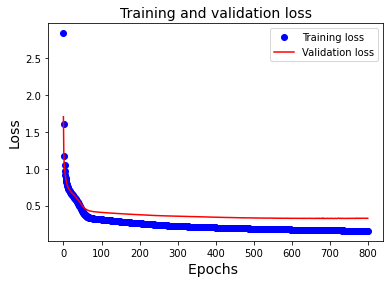

In [70]:
# funstion for train and val losses visualizations
def plot_losses(results):
    plt.plot(results.history['loss'], 'bo', label='Training loss')
    plt.plot(results.history['val_loss'], 'r', label='Validation loss')
    plt.title('Training and validation loss',fontsize=14)
    plt.xlabel('Epochs ',fontsize=14)
    plt.ylabel('Loss',fontsize=14)
    plt.legend()
    plt.show()
    plt.close()

# visualize train and val losses
plot_losses(histry)

Train images


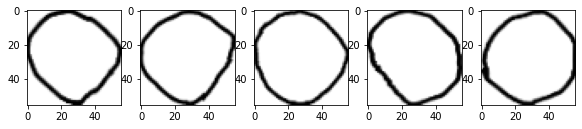

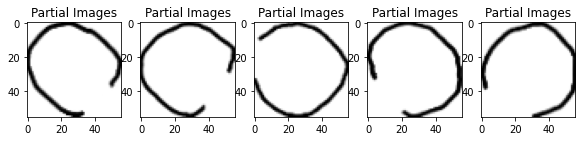

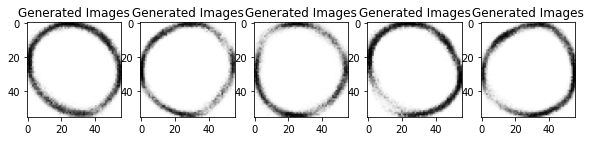

In [71]:
X_test = np.reshape(test_imgs, ((test_end_index-test_start_index),56,56)) *255
plt.figure(figsize=(20, 4))
print("Train images")
for i in range(10,15,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i,:,:], cmap='gray')
plt.show()
 
x_test_noisy = np.reshape(test_partial_imgs, (-1,56,56)) *255
plt.figure(figsize=(20, 4))
for i in range(10,15,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i,:,:], cmap='gray')
    plt.title("Partial Images")
plt.show()    
 
prediction = np.reshape(predictions, ((test_end_index-test_start_index),56,56)) *255
plt.figure(figsize=(20, 4))
for i in range(10,15,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(prediction[i,:,:], cmap='gray')
    plt.title("Generated Images")  
plt.show()

In [72]:
dirname3="/content/drive/MyDrive/colab/dataset/test/partial/";
images3=[]
y3=[]
files=['circle/']

for i in range(len(files)):
    cfiles=glob.glob(dirname3+files[i]+'*.jpg')
    cfiles.sort(key=sortKeyFunc)
    
    for cf in cfiles:
        img=cv2.imread(cf)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        (thresh, imw) = cv2.threshold(img, 1, 1, 1)
        contours, _ = cv2.findContours(imw, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        for c in contours:
            rect = cv2.boundingRect(c)
            # if rect[2] < 100 or rect[3] < 100: 
            #   continue
            x11,y11,w11,h11 = rect
            # cv2.rectangle(img,(x11,y11),(x11+w11,y11+h11),(0,255,0),2)
        a11=x11
        b11=y11
        c11=x11+w11
        d11=y11+h11
        cropped_image = img[b11:d11 , a11:c11]
        newimg=cv2.resize(cropped_image, (56, 56))
        images3.append(newimg)
        y3.append(labels[i])
X3=np.array(images3)
y3=np.array(y3)
print(X3.shape)
print(y3.shape)

(5, 56, 56)
(5,)


In [73]:
dirname4="/content/drive/MyDrive/colab/dataset/test/complete/";
images4=[]
y4=[]
files=['circle/']

for i in range(len(files)):
    cfiles=glob.glob(dirname4+files[i]+'*.jpg')
    cfiles.sort(key=sortKeyFunc)
    
    for cf in cfiles:
        img=cv2.imread(cf)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        (thresh, imw) = cv2.threshold(img, 1, 1, 1)
        contours, _ = cv2.findContours(imw, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        for c in contours:
            rect = cv2.boundingRect(c)
            # if rect[2] < 100 or rect[3] < 100: 
            #   continue
            x11,y11,w11,h11 = rect
            # cv2.rectangle(img,(x11,y11),(x11+w11,y11+h11),(0,255,0),2)
        a11=x11
        b11=y11
        c11=x11+w11
        d11=y11+h11
        cropped_image = img[b11:d11 , a11:c11]
        newimg=cv2.resize(cropped_image, (56, 56))
        images4.append(newimg)
        y4.append(labels[i])
X4=np.array(images4)
y4=np.array(y4)
print(X4.shape)
print(y4.shape)        

(5, 56, 56)
(5,)


In [74]:
testing_set_main=[]
test_lev_m=[]
for i in range(0,5):
  testing_set_main.append(X4[i])
  test_lev_m.append(y4[i])
  test_imgs=np.array(testing_set_main)
  test_labels=np.array(test_lev_m)
print(test_imgs.shape)   
print(test_labels.shape)

(5, 56, 56)
(5,)


In [75]:
testing_partial=[]
test_partial_le=[]
for i in range(0,5):
  testing_partial.append(X3[i])
  test_partial_le.append(y3[i])
  test_partial_imgs=np.array(testing_partial)
  test_partial_labels=np.array(test_partial_le)
print(test_partial_imgs.shape)   
print(test_partial_labels.shape)

(5, 56, 56)
(5,)


In [76]:
num_pixels = 56*56
test_partial_imgs = test_partial_imgs.reshape((5-0), num_pixels).astype('float32')
test_imgs = test_imgs.reshape((5-0), num_pixels).astype('float32')
print(test_partial_imgs.shape)
print(test_imgs.shape)

(5, 3136)
(5, 3136)


In [77]:
predictions = enco_deco.predict(test_partial_imgs)

print("prediction set", predictions.shape)

1/1 [==============================] - 0s 14ms/step
prediction set (5, 3136)


Train images


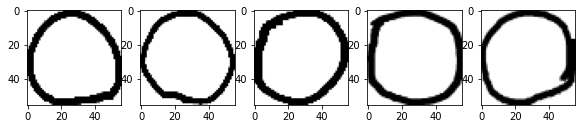

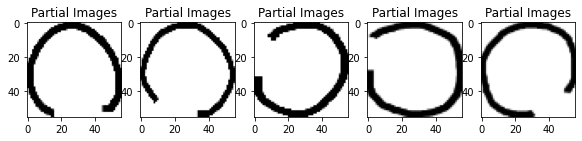

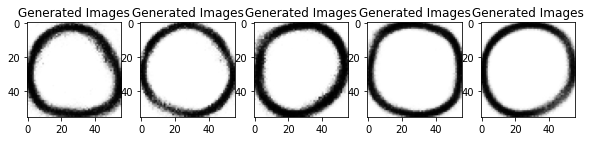

In [78]:

X_test = np.reshape(test_imgs, ((5-0),56,56)) *255
plt.figure(figsize=(20, 4))
print("Train images")
for i in range(0,5,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i,:,:], cmap='gray')
plt.show() 
x_test_noisy = np.reshape(test_partial_imgs, (-1,56,56)) *255
plt.figure(figsize=(20, 4))
for i in range(0,5,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i,:,:], cmap='gray')
    plt.title("Partial Images")
plt.show()    
 
prediction = np.reshape(predictions, ((5-0),56,56)) *255
plt.figure(figsize=(20, 4))
for i in range(0,5,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(prediction[i,:,:], cmap='gray')
    plt.title("Generated Images")  
plt.show()

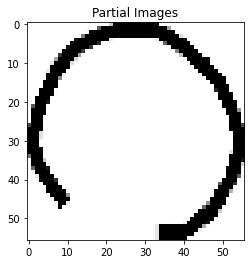

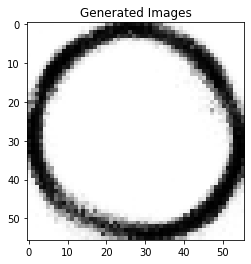

In [79]:
image_id_to_plot = 1 #upto 0 to 4
partial_out = tf.squeeze(x_test_noisy[image_id_to_plot])
plt.imshow(partial_out, cmap='gray')
plt.title("Partial Images") 
plt.show()

output = tf.squeeze(prediction[image_id_to_plot])
plt.imshow(output, cmap='gray')
plt.title("Generated Images") 
plt.show()


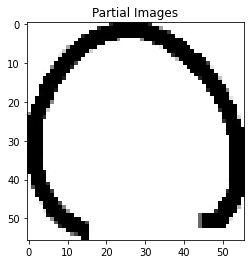

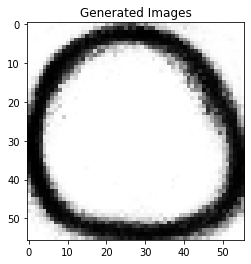

In [80]:
image_id_to_plot = 0 #upto 0 to 4
partial_out = tf.squeeze(x_test_noisy[image_id_to_plot])
plt.imshow(partial_out, cmap='gray')
plt.title("Partial Images") 
plt.show()

output = tf.squeeze(prediction[image_id_to_plot])
plt.imshow(output, cmap='gray')
plt.title("Generated Images") 
plt.show()

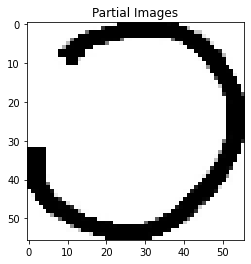

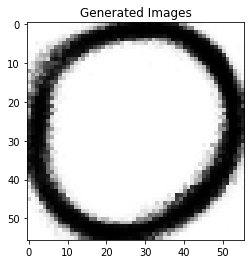

In [81]:
image_id_to_plot = 2 #upto 0 to 4
partial_out = tf.squeeze(x_test_noisy[image_id_to_plot])
plt.imshow(partial_out, cmap='gray')
plt.title("Partial Images") 
plt.show()

output = tf.squeeze(prediction[image_id_to_plot])
plt.imshow(output, cmap='gray')
plt.title("Generated Images") 
plt.show()

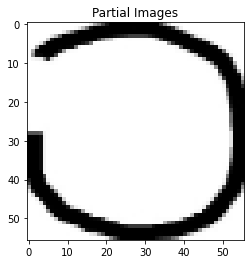

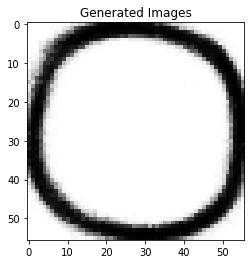

In [82]:
image_id_to_plot = 3 #upto 0 to 4
partial_out = tf.squeeze(x_test_noisy[image_id_to_plot])
plt.imshow(partial_out, cmap='gray')
plt.title("Partial Images") 
plt.show()

output = tf.squeeze(prediction[image_id_to_plot])
plt.imshow(output, cmap='gray')
plt.title("Generated Images") 
plt.show()

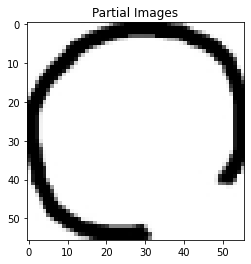

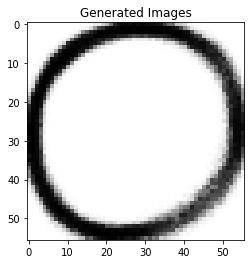

In [83]:
image_id_to_plot = 4 #upto 0 to 4
partial_out = tf.squeeze(x_test_noisy[image_id_to_plot])
plt.imshow(partial_out, cmap='gray')
plt.title("Partial Images") 
plt.show()

output = tf.squeeze(prediction[image_id_to_plot])
plt.imshow(output, cmap='gray')
plt.title("Generated Images") 
plt.show()

In [ ]:
from google.colab import files
from google.colab.patches import cv2_imshow

128
128


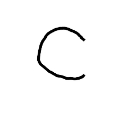

15
9
97
86


In [85]:
dirname2="/content/drive/MyDrive/colab/dataset/dataset/partial/";
images2=[]
y2=[]
files=['circle/']
for i in range(len(files)):
    userData=glob.glob(dirname2+files[i]+'*.jpg')
    userData.sort(key=sortKeyFunc)
img1=userData[605]
img=cv2.imread(img1)
img2=cv2.imread(img1)
gimg_height=img2.shape[0]
gimg_width=img2.shape[1]
print(gimg_height)
print(gimg_width)
cv2_imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)   
contours, _ = cv2.findContours(imw, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
    rect = cv2.boundingRect(c)
    # if rect[2] < 100 or rect[3] < 100: 
    #   continue
    x,y,w,h = rect
    # cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2) 
print(x)  
print(y)  
print(w)  
print(h)  
a=x
b=y
c=x+w
d=y+h

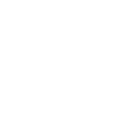

image shape:  (128, 128)


In [86]:
fimg = np.zeros([gimg_height,gimg_width],dtype=np.uint8)
fimg.fill(255)
cv2_imshow( fimg)
print("image shape: ", fimg.shape)

In [ ]:

output = tf.squeeze(prediction[5])
plt.imshow(output, cmap='gray')
plt.show()

In [ ]:
#print(partial_out[30:56, 30:56])
#output=output*255.0
#print(output[30:56, 30:56])  

In [ ]:
fimg[b:d , a:c]=output
plt.imshow(fimg)

In [ ]:
dirnam="/content/drive/MyDrive/colab/dataset/dataset/partial/circle";
files=['complete/','partial/']
labels=[0,1]
